## Проект 2. Разведывательный анализ данных

Задача проекта - отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) #показывать больше строк
pd.set_option('display.max_columns', 50) #показывать больше строк


In [2]:
students = pd.read_csv('stud_math.xls') #загружаем датасет

In [3]:
'''Предобработка'''

# преобразование номинативных переменных в числовые
def transform_column(string): 
    if string == 'nan':
        return None
    elif string == 'yes': 
        return 1
    elif string == 'no':
        return 0

#переименовываем столбцы
students.columns = ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
                   'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
                   'traveltime', 'studytime', 'failures', 'schoolsup',
                    'famsup', 'paid', 'activities', 'nursery',
                    'studytime_granular', 'higher', 'internet', 'romantic',
                    'famrel', 'freetime', 'goout', 'health', 'absences',
                    'score']

def get_boxplot(column): # построение box-plot
    fig, ax = plt.subplots(figsize = (14,4))
    sns.boxplot(x = column, y = 'score',
                data = students, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for' + column)
    plt.show()
    
def get_stat_dif(column): # тест Стьюдента
    cols = students.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(students.loc[students.loc[:, column]==comb[0], 'score'],
                    students.loc[students.loc[:, column]==comb[1],
                                 'score']). pvalue\
        <=0.1/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [4]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   school              395 non-null    object 
 1   sex                 395 non-null    object 
 2   age                 395 non-null    int64  
 3   address             378 non-null    object 
 4   famsize             368 non-null    object 
 5   Pstatus             350 non-null    object 
 6   Medu                392 non-null    float64
 7   Fedu                371 non-null    float64
 8   Mjob                376 non-null    object 
 9   Fjob                359 non-null    object 
 10  reason              378 non-null    object 
 11  guardian            364 non-null    object 
 12  traveltime          367 non-null    float64
 13  studytime           388 non-null    float64
 14  failures            373 non-null    float64
 15  schoolsup           386 non-null    object 
 16  famsup  

В датасете 13 числовых и 17 строковых столбцов, 395 строк. 

Рассмотрим столбцы по отдельности:
## 1) school - аббревиатура школы, в которой учится ученик

In [5]:
pd.DataFrame(students.school.value_counts())

,school
GP,349
MS,46


В данном столбце представлены всего две школы, ошибок и пропусков нет.

Следующий столбец:

## 2) sex - пол ученика

In [6]:
pd.DataFrame(students.sex.value_counts())

,sex
F,208
M,187


В этом столбце также без ошибок. Девочек немного больше, чем мальчиков

## 3) age - возраст ученика

count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

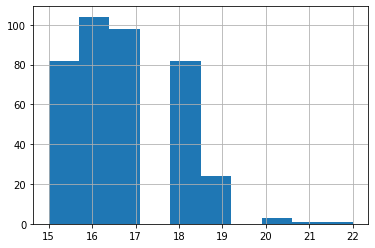

In [7]:
students.age.hist()
students.age.describe()

Возраст учеников от 15 до 22 лет. Основное распределение лежит в диапазоне от 15 до 17.

## 4) address - тип адреса ученика

In [8]:
pd.DataFrame(students.address.value_counts())

,address
U,295
R,83


Большая часть учеников проживают в городе. В столбце присутствуют пропуски. Заполним их наиболее вероятным значением "U":

In [9]:
students.address = students.address.fillna('U')    

## 5) famsize - размер семьи

In [10]:
pd.DataFrame(students.famsize.value_counts())

,famsize
GT3,261
LE3,107


In [11]:
students.famsize.fillna('GT3', inplace = True)

Пропуски заполнены наиболее вероятным значением 'GT3'

Размер семьи у большей части учеников больше 3 

## 6) Pstatus - статус совместного проживания родителей

In [12]:
pd.DataFrame(students.Pstatus.value_counts())

,Pstatus
T,314
A,36


In [13]:
students.Pstatus.fillna('T', inplace = True) #заполняем пропуски

У большинства учеников родители проживают совместно. 

## 7) Medu - образование матери

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

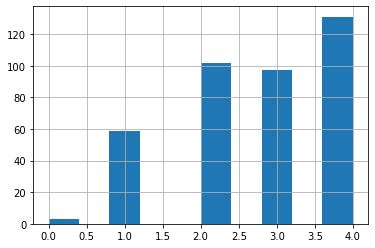

In [14]:
students.Medu.hist()
students.Medu.describe()

In [15]:
students.Medu.fillna(students.Medu.median(), inplace = True)

В данном столбце выбросов нет, пропуски заполнены средним значением(медианой).

## 8) Fedu - образование отца

count    371.000000
mean       2.614555
std        2.228732
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

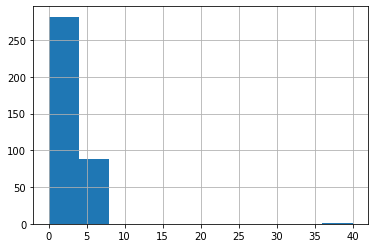

In [16]:
students.Fedu.hist()
students.Fedu.describe()

В этом столбце есть выбросы и пропуски. Пропуски заполним средним значением(медианой). Выброс удалим, зная параметры распределения (значения распределены от 0 до 4)

In [17]:
students.Fedu.fillna(students.Fedu.median(), inplace = True)

students = students.loc[students.Fedu <= 4.0]

## 9) Mjob - работа матери

In [18]:
students.Mjob.value_counts()

other       133
services     97
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

count       375
unique        5
top       other
freq        133
Name: Mjob, dtype: object

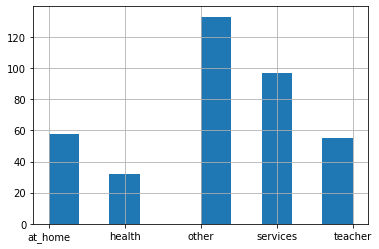

In [19]:
students.Mjob.hist() 
students.Mjob.describe()

In [20]:
students.Mjob.fillna('other', inplace = True)

В столбце 5 значений, пропуски заполнены наиболее вероятным значением.

## 10) Fjob - работа отца

In [21]:
students.Fjob.value_counts()

other       196
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

count       358
unique        5
top       other
freq        196
Name: Fjob, dtype: object

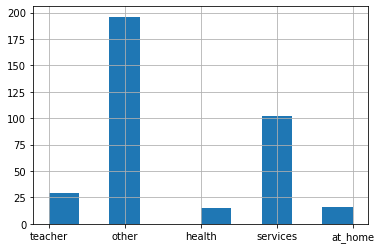

In [22]:
students.Fjob.hist() 
students.Fjob.describe()

In [23]:
students.Fjob.fillna('other', inplace = True)

Также 5 значений, пропуски заполнены наиболее вероятным значением 'other'

## 11) reason - причина выбора школы 

In [24]:
pd.DataFrame(students.reason.value_counts())

,reason
course,137
home,104
reputation,102
other,34


In [25]:
students.reason.fillna('course', inplace = True)

<AxesSubplot:>

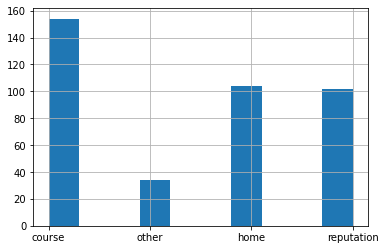

In [26]:
students.reason.hist() #гистограмма после заполнения пропусков

в столбце 4 значения, пропуски заполнены наиболее вероятным 'course'

## 12) guardian - опекун

In [27]:
pd.DataFrame(students.guardian.value_counts())

,guardian
mother,250
father,85
other,28


In [28]:
students.guardian.fillna('mother', inplace = True)

В столбце 3 значения, пропуски заполнены наиболее вероятным значением

## 13) traveltime - время в пути до школы

count    366.000000
mean       1.434426
std        0.690297
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

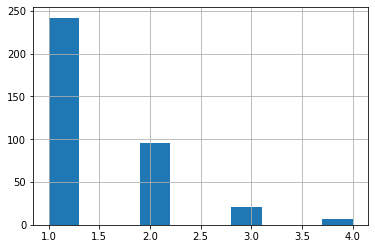

In [29]:
students.traveltime.hist() 
students.traveltime.describe()

In [30]:
students.traveltime.fillna(students.traveltime.median(), inplace = True)

Очевидно, что большая часть учеников тратят на дорогу не более 15 минут. В столбце выбросов нет, пустые значения заполнены средним (медианой).

## 14) studytime - время на учёбу помимо школы в неделю

count    387.000000
mean       2.036176
std        0.841744
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

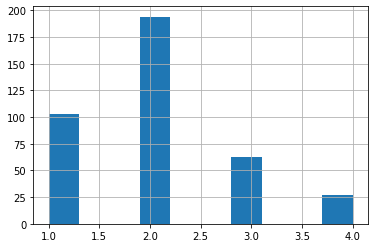

In [31]:
students.studytime.hist()
students.studytime.describe()

In [32]:
students.studytime.fillna(students.studytime.median(), inplace = True)

В данном столбце выбросов нет, пропуски заполнены средним значением (медианой).
Похоже, что большинство учеников тратят на внеучебные занятия не больше 5 часов в неделю

## 15) failures - количество внеучебных неудач

count    372.000000
mean       0.338710
std        0.743929
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

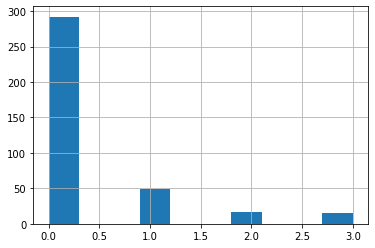

In [33]:
students.failures.hist()
students.failures.describe()

In [34]:
students.failures.fillna(students.failures.median(), inplace = True)

Выбросов нет, пропуски заполнены средним значением (медианой). У большинства учеников отсутствуют неудачи.

## 16) schoolsup - дополнительная образовательная поддержка

In [35]:
pd.DataFrame(students.schoolsup.value_counts())

,schoolsup
no,334
yes,51


In [36]:
students.schoolsup = students.schoolsup.apply(transform_column)
#преобразуем колонку

count    385.000000
mean       0.132468
std        0.339439
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: schoolsup, dtype: float64

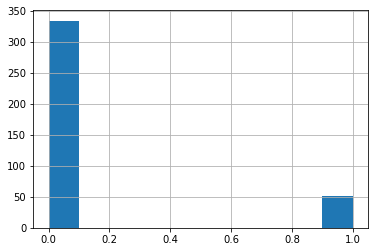

In [37]:
students.schoolsup.hist()
students.schoolsup.describe()

In [38]:
students.schoolsup.fillna(students.schoolsup.median(), inplace = True)

Очевидно, что большинство учеников не получали дополнительную образовательную поддержку

## 17) famsup - семейная образовательная поддержка

In [39]:
students.famsup = students.famsup.apply(transform_column)
#преобразуем колонку

count    355.000000
mean       0.614085
std        0.487498
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: famsup, dtype: float64

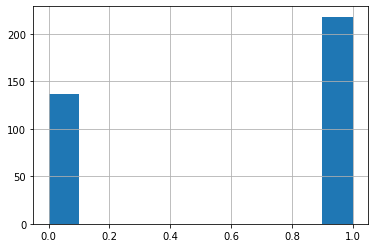

In [40]:
students.famsup.hist()
students.famsup.describe()

В столбце выбросов нет, пропуски заполнены средним значением (медианой)

In [41]:
students.famsup.fillna(students.famsup.median(), inplace = True)

Но получали семейную поддержку

## 18) paid - дополнительные платные занятия по математике

In [42]:
students.paid = students.paid.apply(transform_column)
#преобразуем колонку

count    354.000000
mean       0.437853
std        0.496825
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: paid, dtype: float64

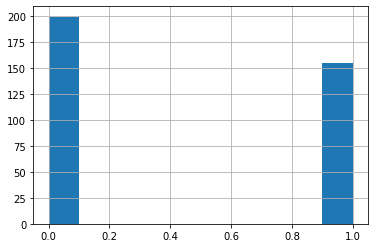

In [43]:
students.paid.hist()
students.paid.describe()

In [44]:
#заполняем пропуски 
students.paid.fillna(students.paid.median(), inplace =True)

Почти половина учеников брали дополнительные платные занятия по математике.

## 19) activities - дополнительные внеучебные занятия

In [45]:
students.activities = students.activities.apply(transform_column)
#преобразуем колонку

count    380.000000
mean       0.510526
std        0.500548
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: activities, dtype: float64

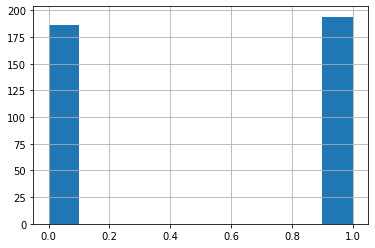

In [46]:
students.activities.hist()
students.activities.describe()

In [47]:
#заполняем пропуски
students.activities.fillna(students.activities.median(), inplace = True)

Усеников, получавших дополнительные внеучебные занятия, немного больше.

## 20) nursery - посещал ли детский сад

In [48]:
students.nursery = students.nursery.apply(transform_column)

count    378.000000
mean       0.791005
std        0.407129
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: nursery, dtype: float64

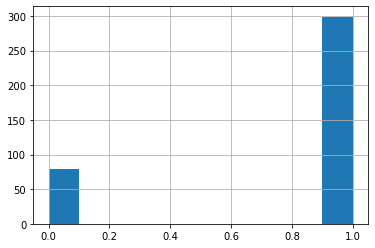

In [49]:
students.nursery.hist()
students.nursery.describe()

In [50]:
#заполняем пропуски 
students.nursery.fillna(students.nursery.median(), inplace = True)

Большинство ходили в детский сад

## 21) higher - хочет ли получить высшее образование

In [51]:
students.higher = students.higher.apply(transform_column)

count    374.000000
mean       0.949198
std        0.219888
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: higher, dtype: float64

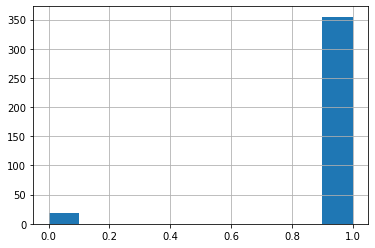

In [52]:
students.higher.hist()
students.higher.describe()

In [53]:
#заполняем пропуски
students.higher.fillna(students.higher.median(), inplace = True)

Большинство хотят получить высшее образование

## 22) internet - наличие интернета дома

In [54]:
students.internet = students.internet.apply(transform_column)

count    360.000000
mean       0.844444
std        0.362938
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: internet, dtype: float64

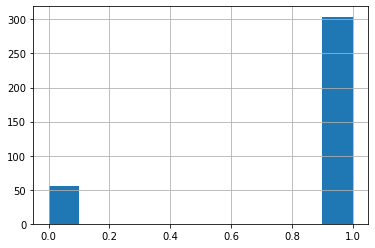

In [55]:
students.internet.hist()
students.internet.describe()

In [56]:
#заполняем пропуски
students.internet.fillna(students.internet.median(), inplace = True)

У подавляющего большинства учеников дома есть доступ в интернет

## 23) romantic - наличие романтических отношений

In [57]:
students.romantic = students.romantic.apply(transform_column)

count    363.000000
mean       0.341598
std        0.474900
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: romantic, dtype: float64

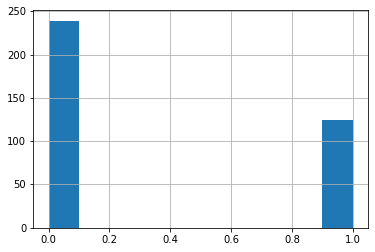

In [58]:
students.romantic.hist()
students.romantic.describe()

In [59]:
#заполняем пропуски
students.romantic.fillna(students.romantic.median(), inplace = True)

У большей части отсутствуют романтические отношения

## 24) famrel - семейные отношения

count    367.000000
mean       3.934605
std        0.926876
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

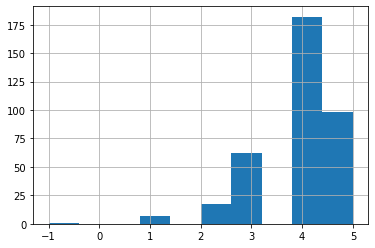

In [60]:
students.famrel.hist()
students.famrel.describe()

In [61]:
students.famrel.fillna(students.famrel.median(), inplace = True)

In [62]:
students = students.loc[students.famrel >= 1.0]

В этом столбце есть выброс и пропуски. Пропуски заполняем средним значением (медианой), выброс удаляем используя параметры распределения (от 1 до 5)

В целом, у учеников хорошие семейные отношения.

## 25) freetime - свободное время после школы

count    382.000000
mean       3.238220
std        0.992521
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

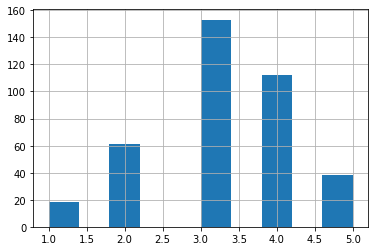

In [63]:
students.freetime.hist()
students.freetime.describe()

In [64]:
students.freetime.fillna(students.freetime.median(), inplace = True)

Выбросов нет, пропуски заполнены средним значением (медианой). 
Очевидно, что у учеников досаточно свободного времени

## 26) goout - проведение времени с друзьями

count    385.000000
mean       3.111688
std        1.115933
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

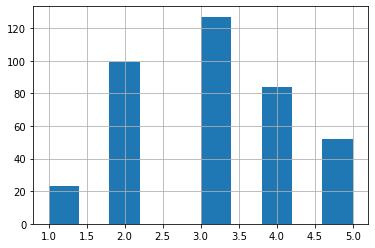

In [65]:
students.goout.hist()
students.goout.describe()

In [66]:
#заполняем пропуски
students.goout.fillna(students.goout.median(), inplace = True)

Без выбросов. Похоже, что часть своего свободного времени ученики проводят с друзьями.

## 27) health - текущее состояние здоровья

count    378.000000
mean       3.526455
std        1.397455
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

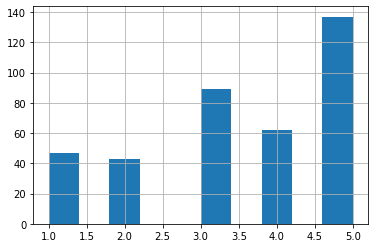

In [67]:
students.health.hist()
students.health.describe()

In [68]:
#заполняем пропуски
students.health.fillna(students.health.median(), inplace = True)

Без выбросов, пропуски заполнены средним значением(медианой). Со здоровьем у большинства учеников всё в порядке

## 28) absences - количество пропущенных занятий

count    381.000000
mean       7.270341
std       23.523737
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

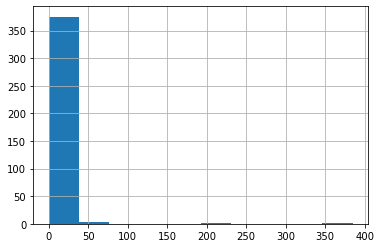

In [69]:
students.absences.hist()
students.absences.describe()

In [70]:
students.absences.fillna(students.absences.median(), inplace = True)

В столбце пропуски заполнены средним значением (медианой). Для фильтрации выбросов воспользуемся  формулой интерквартильного расстояния.

<AxesSubplot:>

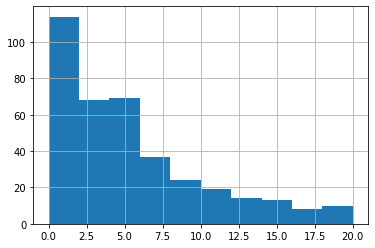

In [71]:
#вычисляем межквартильный размах:
iqr = students.absences.quantile(0.75) - students.absences.quantile(0.25)

#25-й перцентиль:
perc25 = students.absences.quantile(0.25)
#75-й перцентиль:
perc75 = students.absences.quantile(0.75)

#верхняя граница выбросов:
l = perc75 + 1.5*iqr
#нижняя граница выбросов:
f = perc25 - 1.5*iqr

students.absences.loc[students.absences.between(f, l)].hist()

<AxesSubplot:>

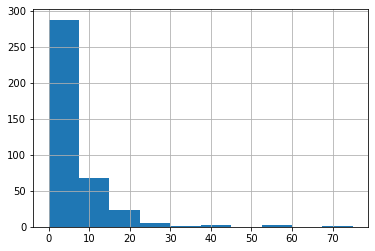

In [72]:
students.absences.loc[students.absences < 212.].hist()

In [73]:
students = students.loc[students.absences < 212.]

Если фильтровать выбросы, используя межквартильный размах, мы теряем большое количество данных по ученикам. А они могли пропустить больше 20 занятий, например, по болезни. Потому убирать будем только очевидно экстремальные значения 212 и 385

## 29) score - баллы по госэкзамену по математике

count    385.000000
mean      52.207792
std       22.962457
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

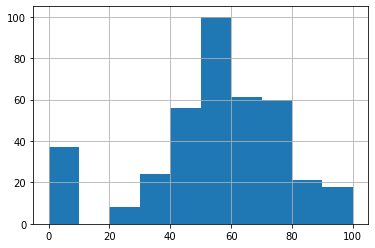

In [74]:
students.score.hist()
students.score.describe()

In [75]:
students.score.fillna(students.score.median(), inplace = True)

В датасете есть ученики, у которых балл за экзамен по математике равен 0. Либо в представленном датасете ошибка, либо ученик не писал экзамен. Потому для дальнейшего анализа будем использовать только ненулевые значения.

In [76]:
students = students.loc[students.score > 0.0]

## 30) studytime, granular

Мы не знаем какие данные представлены в данном столбце, для начала посмотрим на распределение параметра

<AxesSubplot:>

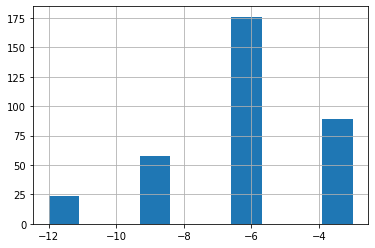

In [77]:
students.studytime_granular.hist()

Уберём "-"

In [78]:
students.studytime_granular = students.studytime_granular.apply(
lambda x: float(str(x).replace('-', '')))

In [79]:
#заполняем пропуски
students.studytime_granular.fillna(
    students.studytime_granular.median(), inplace = True)

Выясним, какие столбцы коррелируют с оценкой результатов по математике. Это поможет понять, какие параметры стоит оставить для модели, а какие — исключить.

Корреляции рассмотрим только для числовых столбцов.

In [80]:
students.corr()

,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,studytime_granular,higher,internet,romantic,famrel,freetime,goout,health,absences,score
age,1.000000,-0.143524,-0.127709,0.122769,-0.005947,0.253513,-0.248855,-0.126224,-0.027822,-0.150380,-0.122418,-0.005947,-0.196423,-0.076434,0.181451,0.069295,-0.004432,0.127334,-0.054687,0.200237,-0.127815
Medu,-0.143524,1.000000,0.583275,-0.167193,0.066650,-0.210472,-0.062105,0.183951,0.146106,0.117726,0.178214,0.066650,0.197987,0.189145,0.055159,-0.025733,0.004729,0.063586,-0.038772,0.078607,0.186740
Fedu,-0.127709,0.583275,1.000000,-0.149912,-0.024358,-0.251884,0.033711,0.176044,0.089941,0.109442,0.166396,-0.024358,0.163725,0.136331,0.036251,-0.031680,-0.039878,0.034460,0.006680,0.026591,0.121946
traveltime,0.122769,-0.167193,-0.149912,1.000000,-0.105600,0.113158,0.002499,-0.015127,-0.042322,-0.009519,-0.043609,-0.105600,-0.127934,-0.063103,0.060342,-0.035655,-0.005669,0.049204,-0.030027,0.007408,-0.075156
studytime,-0.005947,0.066650,-0.024358,-0.105600,1.000000,-0.136754,0.016287,0.128338,0.221931,0.075697,0.063054,1.000000,0.138446,0.072720,0.066977,0.038950,-0.124901,-0.028008,-0.078914,-0.075163,0.136134
failures,0.253513,-0.210472,-0.251884,0.113158,-0.136754,1.000000,0.052886,-0.074721,-0.138672,-0.071502,-0.087201,-0.136754,-0.287326,-0.077683,0.081664,0.026101,0.129799,0.139756,0.043681,0.120673,-0.270999
schoolsup,-0.248855,-0.062105,0.033711,0.002499,0.016287,0.052886,1.000000,0.101327,-0.036707,0.118833,0.032024,0.016287,0.034769,-0.005152,-0.045379,0.025923,-0.056092,-0.017179,-0.023739,0.008152,-0.254089
famsup,-0.126224,0.183951,0.176044,-0.015127,0.128338,-0.074721,0.101327,1.000000,0.233237,0.001211,0.033316,0.128338,0.079633,0.070793,0.041466,0.013198,0.037917,-0.016040,0.046274,0.065638,-0.036770
paid,-0.027822,0.146106,0.089941,-0.042322,0.221931,-0.138672,-0.036707,0.233237,1.000000,0.014803,0.122517,0.221931,0.163583,0.153025,0.084110,-0.020850,-0.041042,0.065739,-0.043621,-0.045287,0.005036
activities,-0.150380,0.117726,0.109442,-0.009519,0.075697,-0.071502,0.118833,0.001211,0.014803,1.000000,0.032192,0.075697,0.024980,0.061360,-0.039254,0.055952,0.082216,0.031720,0.021305,-0.031123,0.053150


Корреляционный анализ нам показал положительную зависимость результата итогового теста от таких параметров как: Medu, Fedu, studytime, higher, studytime granular (образование обоих родителей и время на учёбу помимо школы). А также обратную зависимость с такими параметрами как: age, failures, schoolsup, goout, absences. 

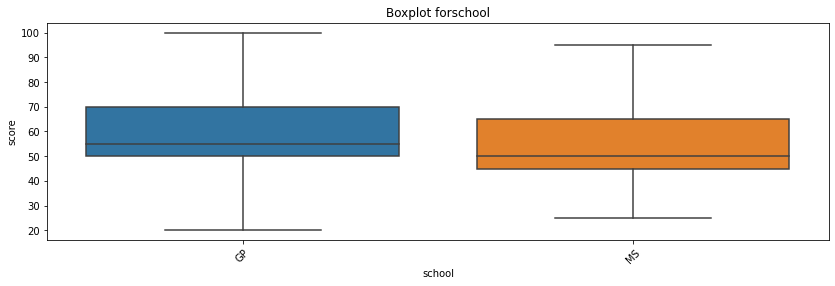

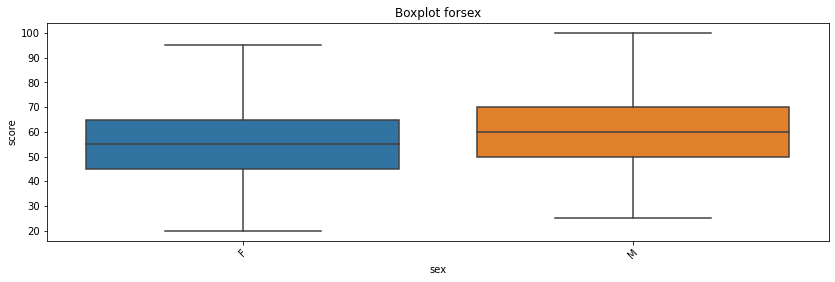

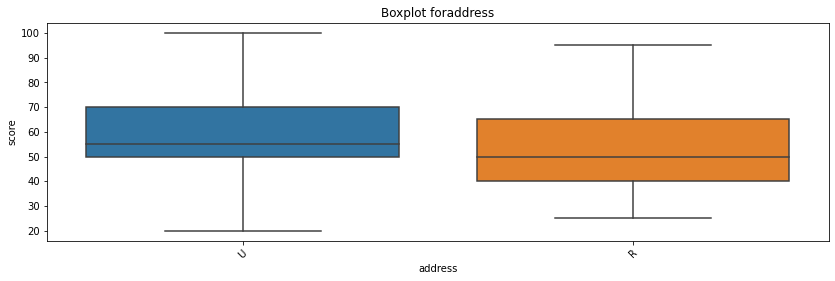

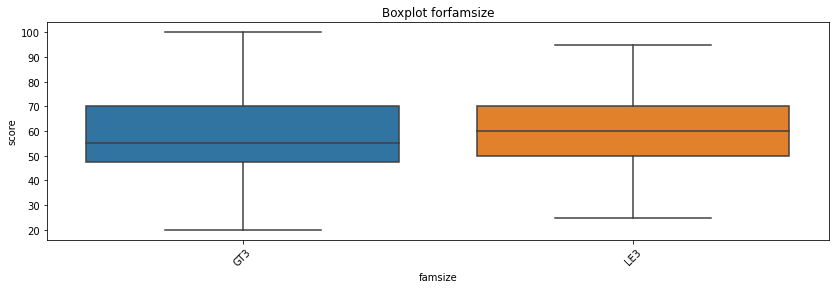

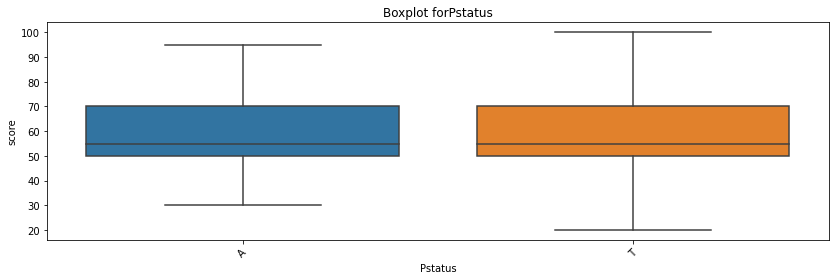

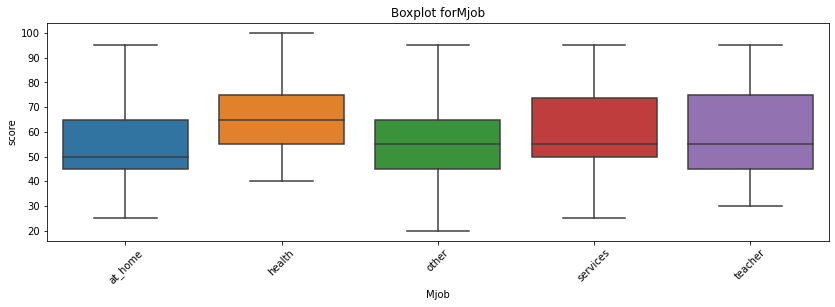

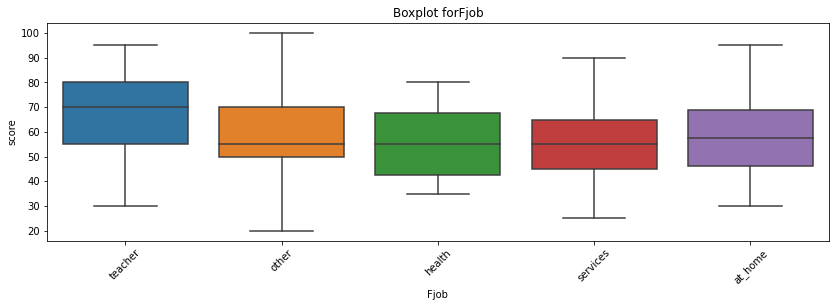

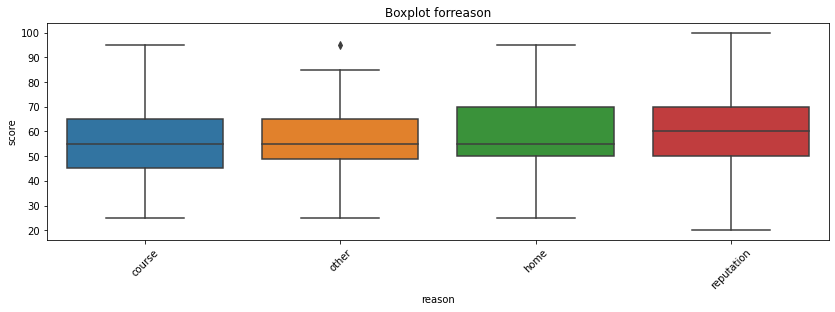

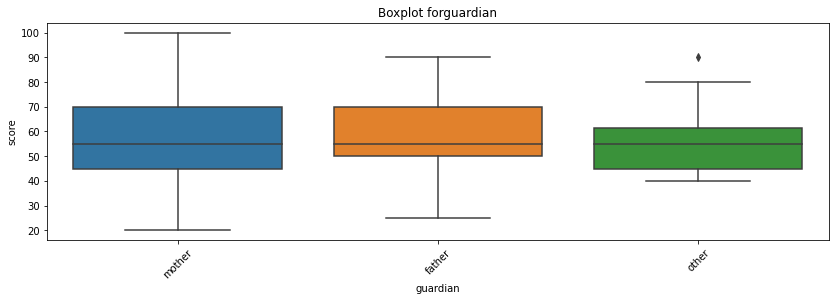

In [81]:
for col in ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
           'reason', 'guardian']:
    get_boxplot(col)

По графикам похоже, что параметры sex, address, Mjob, Fjob, reason, guardian могут влиять на итоговое значение score. Проверим это с помощью теста Стьюдента:

In [82]:
for col in ['sex', 'address', 'Mjob', 'Fjob', 'reason',
           'Pstatus', 'guardian']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Fjob


Оставим только значимые параметры

In [83]:
students_for_model = students.loc[:, ['sex', 'address', 'Mjob', 'Medu', 'Fedu',
                                'studytime', 'studytime_granular', 'age', 
                                'failures', 'schoolsup', 'goout', 'Fjob',
                                      'higher', 'absences']]

students_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 394
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   sex                 354 non-null    object 
 1   address             354 non-null    object 
 2   Mjob                354 non-null    object 
 3   Medu                354 non-null    float64
 4   Fedu                354 non-null    float64
 5   studytime           354 non-null    float64
 6   studytime_granular  354 non-null    float64
 7   age                 354 non-null    int64  
 8   failures            354 non-null    float64
 9   schoolsup           354 non-null    float64
 10  goout               354 non-null    float64
 11  Fjob                354 non-null    object 
 12  higher              354 non-null    float64
 13  absences            354 non-null    float64
dtypes: float64(9), int64(1), object(4)
memory usage: 49.6+ KB


## Вывод:

В результате EDA для анализа влияния условий жизни учеников на результаты итогового теста по математике, получены следующие результаты:

Практически в каждом стобце, за исключением столбцов school, sex и age. Удалять строки с пропусками не представляется возможным, будут слишком большие потери в данных. Пропуски заполнялись наиболее вероятным значением для номинативных переменных и медианой для числовых.

Выбросы  были в колонках Fedu, famrel, absences, score. Выбросы были удалены, в итоге осталось 354 записи в датасете.

Положительная кореляция параметров score и Medu, Fedu, studytime, higher, studytime granular говорит нам о том, что образование родителей и время на дополнительные занятия вкупе с желанием поступить в высшее учебное заведение в дальнейшем, мотивируют учеников на прилежную учёбу.

В то время такой параметр как schoolsup скорее всего показывает дополнительную образовательную поддержку для учеников, имеющих проблемы с успеваемостью.

Параметры age, failures, goout, absences оказывают негативное влияние наитоговые результаты.

Также стоит обратить внимание на такие параметры как sex, address, Fjob, Mjob.
